#Assignment 4 - task 3

We want to prove that the average trip duration of suscribers in June is greater than the average trip duration of costumers in December. Therefore, we can express our null hypothesis as:


$H_0: \mu _u = \mu _a $, where $\mu_ u$ is the trip duration mean for June and $\mu _a$ is the trip duration mean for January at a $95 \%$ conffidence level

In [23]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import math
import requests
import StringIO
import zipfile

In [24]:
#We read two files: data for december 2014 and data for june 2015 from the citibike website
#dec=pd.read_csv('dec14.csv', delimiter=",", na_values=["/N"], header=0, 
 #                  usecols = ("tripduration", "usertype"))
#june=pd.read_csv('june15.csv', delimiter=",", na_values=["/N"], header=0, 
 #                  usecols = ("tripduration", "usertype"))

In [25]:
#Instead of getting the data from a local file, we sourced it from the internet
r = requests.get('https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content)) 
june = pd.read_csv(z.open('201506-citibike-tripdata.csv'),usecols = ("tripduration", "usertype"))
june = june.dropna()
june.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941219 entries, 0 to 941218
Data columns (total 2 columns):
tripduration    941219 non-null int64
usertype        941219 non-null object
dtypes: int64(1), object(1)
memory usage: 21.5+ MB


In [26]:
#we do the same for december 2014 data
r1 = requests.get('https://s3.amazonaws.com/tripdata/201412-citibike-tripdata.zip')
z1 = zipfile.ZipFile(StringIO.StringIO(r1.content)) 
dec = pd.read_csv(z1.open('201412-citibike-tripdata.csv'),usecols = ("tripduration", "usertype"))
dec = dec.dropna()
dec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399069 entries, 0 to 399068
Data columns (total 2 columns):
tripduration    399069 non-null int64
usertype        399069 non-null object
dtypes: int64(1), object(1)
memory usage: 9.1+ MB


In [27]:
#We set an alpha value, and we get the mean for trip duration grouped by usertype
alpha=0.5
TD_dec= dec['tripduration'].groupby(dec['usertype']).mean()
TD_june= june['tripduration'].groupby(dec['usertype']).mean()

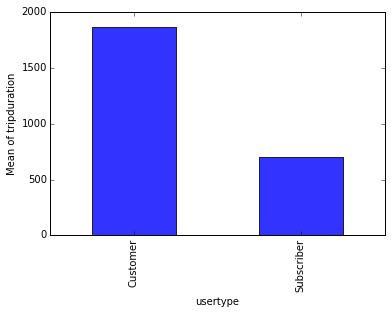

In [28]:
ax=TD_dec.plot(kind='bar',alpha=0.8)
ax.set_ylabel('Mean of tripduration')

The figure above is showing us the mean in Trip Duration for Customers and suscribers for December 2014, then we do the same for June 2015

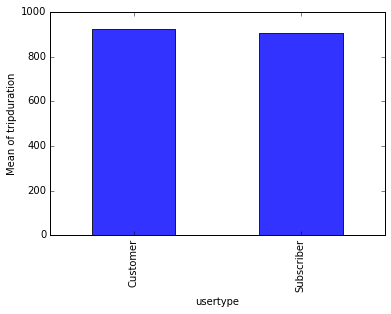

In [29]:
ax=TD_june.plot(kind='bar',alpha=0.8)
ax.set_ylabel('Mean of tripduration')

#For the purpose of this experiment we are going to only look at customers during the months of December and June, respectively.  Therefore we are going to extract only customers from the data. We are assuming that the customers from the two months represent people who do not use the bikes for commutes (i.e. tourists or ocassional users). We want to look at high tourist months in NYC and determine if the results are statistically significant. 

In [30]:
#Subset the original data frames for usertype= Customer
dec_customer = dec [dec.usertype == 'Customer']
june_customer = june [june.usertype == 'Customer']

{'boxes': [<matplotlib.lines.Line2D at 0x146f2550>],
 'caps': [<matplotlib.lines.Line2D at 0x146ff2e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1470b390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x146ffdd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x156da128>,
  <matplotlib.lines.Line2D at 0x146f2d30>]}

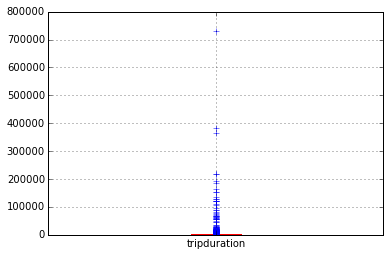

In [31]:
#Now, we are going to take a look on our data:
#We assume that there could be outliers in the data, so we want to plot a box plot to see them.
dec_customer.boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x14157390>],
 'caps': [<matplotlib.lines.Line2D at 0x151f2128>,
 'fliers': [<matplotlib.lines.Line2D at 0x151ff1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x151f2c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x140fe898>,
  <matplotlib.lines.Line2D at 0x14157b70>]}

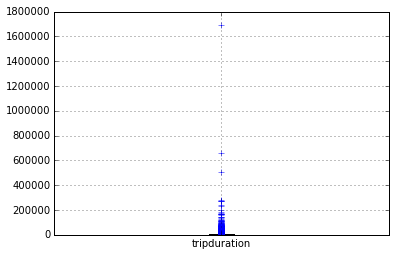

In [32]:
june_customer.boxplot()

This doesn't look good. There are several outliers that we must get rid of!

In [33]:
#For get rid of outliers, we perform a zscore testins with 2 stds tolerance
dec_customer['zscore'] = ((dec_customer['tripduration']-dec_customer['tripduration'].mean())/dec_customer['tripduration'].std())
june_customer['zscore'] = ((june_customer['tripduration']-june_customer['tripduration'].mean())/june_customer['tripduration'].std())

#Clean the data sets 2 stds:
dec_clean = dec_customer[(dec_customer.zscore <= 2) & (-2 <= dec_customer.zscore)]
june_clean = june_customer[(june_customer.zscore <= 2) & (-2 <= june_customer.zscore)]

C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0xbe61dd8>],
 'caps': [<matplotlib.lines.Line2D at 0x11ba7b70>,
 'fliers': [<matplotlib.lines.Line2D at 0x11bb3c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11bb36a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1441f3c8>,
  <matplotlib.lines.Line2D at 0x11ba75f8>]}

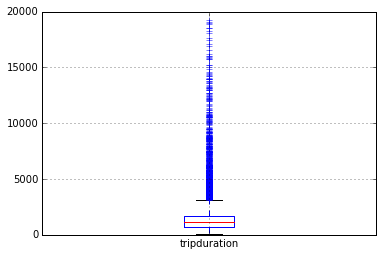

In [34]:
#in order to visualize the data now we need to convert the data to a data frame.
dec_clean_tripduration=dec_clean['tripduration'].to_frame()
dec_clean_tripduration.boxplot()


{'boxes': [<matplotlib.lines.Line2D at 0x15867518>],
 'caps': [<matplotlib.lines.Line2D at 0x159162b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x15923358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x15916da0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xbba5e48>,
  <matplotlib.lines.Line2D at 0x15867cf8>]}

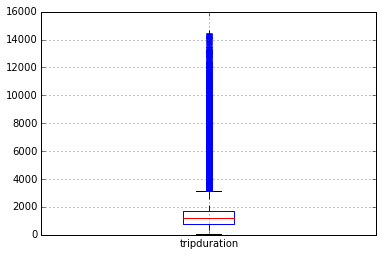

In [35]:
#in order to visualize the data now we need to convert the data to a data frame.
june_clean_tripduration=june_clean['tripduration'].to_frame()
june_clean_tripduration.boxplot()

In [36]:
#now our data is clean, lets take a look at the means of our data sets:
print dec_clean_tripduration.mean()
print june_clean_tripduration.mean() 

tripduration    1517.284767
dtype: float64
tripduration    1521.526425
dtype: float64


In [37]:
#we need to calculate the mean, standard deviation, and count of the data in order to run a t test. 
sd_dec = dec_clean_tripduration.std()
mean_dec = dec_clean_tripduration.mean()
sd_june = june_clean_tripduration.std()
mean_june = june_clean_tripduration.mean()
count_dec=june_clean_tripduration.count()
count_june=june_clean_tripduration.count()

#Compute the t-stat:
t= (mean_june - mean_dec)/ math.sqrt ((sd_june **2 /count_june)+ (sd_dec **2/count_dec))
print t

tripduration    0.716812
dtype: float64


Since we are dealling with data sets that have degrees of freedom larger than 120 we will use $\infty$ to look up the critical value on the table, and it corresponds to $1.96$ (value for two tailed test).

##Since, our calculated t value $0.7168$ is smaller than the critical value $1.96$ we fail to reject the null hypothesis, that the trip duration means for december and june are equal with a confidence level of 95%

Even though it is cold outside it seems like people still ride their bikes for just as long as in the winter as in the summer. 